In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import rasterio as rio
import geopandas as gpd
from rasterio.plot import show
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

-------------------------

# __Texas HPA__

## Is ET more correlated to precipitation or Irrigation?

### ET vs Precip : Irrigated

In [16]:
TX_monthly_df = pd.read_csv('../../Data_main/Data_Drivers_of_ET/CSVs/2km/TX_monthly.csv')
# TX_monthly_df.head()

In [17]:
TX_irrigated_df = TX_monthly_df[TX_monthly_df['Irrigated'] == 1]
# TX_irrigated_df.head()

In [18]:
x = TX_irrigated_df[['PRISM_PPT']]
y = TX_irrigated_df[['Irrigated_cropET']]

#train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, shuffle=True)
x_train, x_test, y_train, y_test = x_train.values, x_test.values, y_train.values, y_test.values

# linear model
lm = LinearRegression()
lm_trained = lm.fit(x_train, y_train)
lm_trained.coef_

array([[0.22800785]])

Coefficient of determination: 0.06


Text(0, 0.5, 'Monthly Irrigated cropET (mm)')

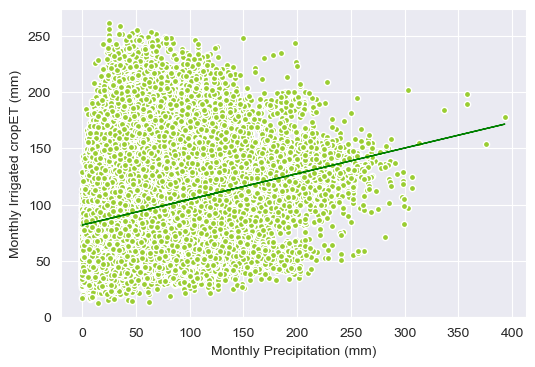

In [19]:
# R2 
y_test_pred = lm_trained.predict(x_test)
r2 = r2_score(y_test, y_test_pred)

# plot performance
fig, ax = plt.subplots(figsize=(6, 4))
sns.set_style("darkgrid")

print("Coefficient of determination: %.2f" % r2)
plt.scatter(x_test, y_test, facecolor='yellowgreen', edgecolor='white', s=20)
plt.plot(x_test, y_test_pred, color='green', linewidth=1)
plt.xlabel('Monthly Precipitation (mm)')
plt.ylabel('Monthly Irrigated cropET (mm)')

### ET vs Precip : Rainfed

In [20]:
TX_rainfed_df = TX_monthly_df[TX_monthly_df['Rainfed'] == 1]
# TX_rainfed_df.head()

In [21]:
x = TX_rainfed_df[['PRISM_PPT']]
y = TX_rainfed_df[['Rainfed_cropET']]

#train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, shuffle=True)
x_train, x_test, y_train, y_test = x_train.values, x_test.values, y_train.values, y_test.values

# linear model
lm = LinearRegression()
lm_trained = lm.fit(x_train, y_train)
lm_trained.coef_

array([[0.19738478]])

Coefficient of determination: 0.11


Text(0, 0.5, 'Monthly Rainfed cropET (mm)')

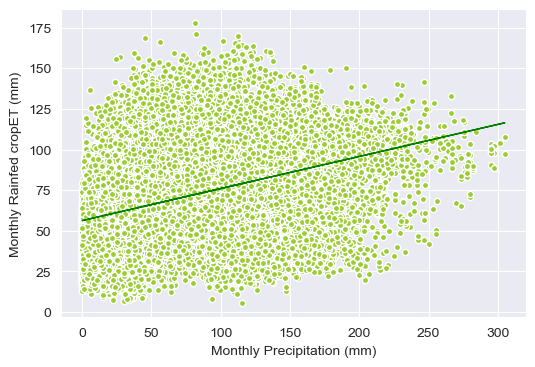

In [22]:
# R2 
y_test_pred = lm_trained.predict(x_test)
r2 = r2_score(y_test, y_test_pred)

# plot performance
fig, ax = plt.subplots(figsize=(6, 4))
sns.set_style("darkgrid")

print("Coefficient of determination: %.2f" % r2)
plt.scatter(x_test, y_test, facecolor='yellowgreen', edgecolor='white', s=20)
plt.plot(x_test, y_test_pred, color='green', linewidth=1)
plt.xlabel('Monthly Precipitation (mm)')
plt.ylabel('Monthly Rainfed cropET (mm)')

## Precipitation vs Irrigation

In [3]:
TX_ann_df = pd.read_csv('../../Data_main/Data_Drivers_of_ET/CSVs/2km/TX_yearly.csv')
TX_ann_df.columns

Index(['USDA_CDL', 'Irrigated', 'Rainfed', 'Irrigated_cropET',
       'Rainfed_cropET', 'PRISM_PPT'],
      dtype='object')

In [5]:
TX_rainfed_df = TX_ann_df[TX_ann_df['Rainfed'] == 1]
TX_irrigated_df = TX_ann_df[TX_ann_df['Irrigated'] == 1]

In [6]:
# Irrigated cropET vs Precipitation linear model
x_2 = TX_irrigated_df [['PRISM_PPT']]
y_2 = TX_irrigated_df [['Irrigated_cropET']]

# train-test split
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, test_size=0.3, random_state=0, shuffle=True)
x_train_2, x_test_2, y_train_2, y_test_2 = x_train_2.values, x_test_2.values, y_train_2.values, y_test_2.values

# linear model
lm_2 = LinearRegression()
lm_trained_2 = lm_2.fit(x_train_2, y_train_2)


# Rainfed cropET vs Precipitation linear model
x_3 = TX_rainfed_df[['PRISM_PPT']]
y_3 = TX_rainfed_df[['Rainfed_cropET']]

# train-test split
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3, y_3, test_size=0.3, random_state=0, shuffle=True)
x_train_3, x_test_3, y_train_3, y_test_3 = x_train_3.values, x_test_3.values, y_train_3.values, y_test_3.values

# linear model
lm_3 = LinearRegression()
lm_trained_3 = lm_3.fit(x_train_3, y_train_3)

In [7]:
# prediction irrigated cropET vs irrigation model
y_test_pred_2 = lm_trained_2.predict(x_test_2)

# prediction rainfed cropET vs irrigation model
y_test_pred_3 = lm_trained_3.predict(x_test_3)

print(f'Slope of Annual Irrigated cropET vs precipitation {lm_trained_2.coef_}')
print(f'Slope of Annual Rainfed cropET vs precipitation {lm_trained_3.coef_}')

print(f'Slope of Annual Irrigation vs precipitation after removing effect of rainfed cropET {lm_trained_2.coef_[0][0] - lm_trained_3.coef_[0][0]}')

Slope of Annual Irrigated cropET vs precipitation [[0.37079062]]
Slope of Annual Rainfed cropET vs precipitation [[0.43344349]]
Slope of Annual Irrigation vs precipitation after removing effect of rainfed cropET -0.06265287359643351


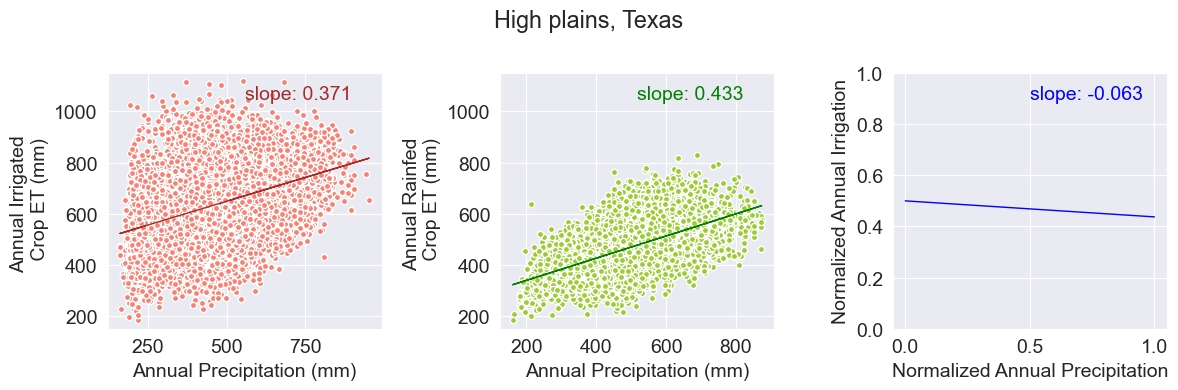

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))
sns.set_style("darkgrid")
fig.set_facecolor('none')

plt.rcParams['font.size'] = '14'

ax[0].scatter(x_test_2, y_test_2, facecolor='salmon', edgecolor='white', s=20)
ax[0].plot(x_test_2, y_test_pred_2, color="brown", linewidth=1)
ax[0].set_xlabel('Annual Precipitation (mm)')
ax[0].set_ylabel('Annual Irrigated \n Crop ET (mm)')
ax[0].set_ylim(150, 1150)
ax[0].tick_params(axis='both')
ax[0].text(0.5, 0.9, f'slope: {round(lm_trained_2.coef_[0][0], 3)}', transform=ax[0].transAxes, color='brown')

ax[1].scatter(x_test_3, y_test_3, facecolor='yellowgreen', edgecolor='white', s=20)
ax[1].plot(x_test_3, y_test_pred_3, color="green", linewidth=1)
ax[1].set_xlabel('Annual Precipitation (mm)')
ax[1].set_ylabel('Annual Rainfed \n Crop ET (mm)')
ax[1].set_ylim(150, 1150)
ax[1].tick_params(axis='both')
ax[1].text(0.5, 0.9, f'slope: {round(lm_trained_3.coef_[0][0], 3)}', transform=ax[1].transAxes, color='green')

# making the plot of slope that represents the basin's annual relationship between irrigation and precipitataion. Both irrigation and precipitation values
# are set between 0 to 1
irrig_eff_slope = lm_trained_2.coef_[0][0] - lm_trained_3.coef_[0][0]  # slope derived from slope of irrigation cropET bs precip and rainfed cropET vs precip
arb_intercept = 0.5
x_vals = np.linspace(0, 1, 100)
y_vals = arb_intercept + irrig_eff_slope * x_vals

ax[2].plot(x_vals, y_vals, color="blue", linewidth=1)
ax[2].set_xlabel('Normalized Annual Precipitation')
ax[2].set_ylabel('Normalized Annual Irrigation')
ax[2].set_ylim(0, 1)
ax[2].tick_params(axis='both')
ax[2].text(0.5, 0.9, f'slope: {round(irrig_eff_slope, 3)}', transform=ax[2].transAxes, color='blue')
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:0.1f}"))

plt.suptitle('High plains, Texas')
plt.tight_layout()

current_dir = os.getcwd()
figdir = 'figs'
figname = 'TX_irrigated_rainfed_ET_precip_linearity.png'
fig.savefig(os.path.join(current_dir, figdir, figname), dpi=150)

We subtract the slope of rainfet cropET vs precipitation from irrigated cropET vs precipitataion to determine the true effect of precipitation on irrigation. The resulting -0.063 slope denotes that for 100 mm increase in precipitation irrigation reduces by 6.3 mm.

# How ET varies with crop type

In [3]:
# USDA CDL crop classification
USDA_cdl_class_df = pd.read_csv('../../Data_main\Data_Drivers_of_ET/CSVs/USDA_cdl_classification.csv')
USDA_cdl_class_df = USDA_cdl_class_df.set_index(keys='Class')
# USDA_cdl_class_df.head()

# making the df to a dictionary
usda_cdl_dict = USDA_cdl_class_df.to_dict()
usda_cdl_dict = usda_cdl_dict['Crop']
# usda_cdl_dict

## Irrigated vs rainfed monthly

In [4]:
TX_monthly_df = pd.read_csv('../../Data_main/Data_Drivers_of_ET/CSVs/2km/TX_monthly.csv')

# irrigated and rainfed crop status and irrigated and rainfed cropET are exclusive. Creating columns to bring them in same colums for plotting purpose
TX_monthly_df['Irrig_stat'] = ['Irrigated'  if i == 1 else 'Rainfed' for i in TX_monthly_df.Irrigated] 
TX_monthly_df['Irrig_rainfed_cropET'] = TX_monthly_df['Irrigated_cropET'] + TX_monthly_df['Rainfed_cropET']

# filtering out some cells which are neither irrigated or rainfed (0 values were assigned from reference raster)
TX_monthly_df = TX_monthly_df[(TX_monthly_df.Irrigated == 1) | (TX_monthly_df.Rainfed == 1)]

# mapping name of crop type using USDA CDL dictionary
TX_monthly_df.loc[:, 'Crop'] = TX_monthly_df['USDA_CDL'].map(usda_cdl_dict)
TX_monthly_df.head()

,OpenET,year,month,Irrigated_cropET,Rainfed_cropET,PRISM_PPT,USDA_CDL,Irrigated,Rainfed,Irrig_stat,Irrig_rainfed_cropET,Crop
0,41.0,2016,4,0.000000,40.105934,107.379,176.0,0.0,1.0,Rainfed,40.105934,Grassland/Pasture
1,39.0,2016,4,0.000000,39.466534,104.834,176.0,0.0,1.0,Rainfed,39.466534,Grassland/Pasture
2,42.0,2016,4,42.052303,0.000000,104.834,176.0,1.0,0.0,Irrigated,42.052303,Grassland/Pasture
3,51.0,2016,4,53.406147,0.000000,103.366,176.0,1.0,0.0,Irrigated,53.406147,Grassland/Pasture
4,55.0,2016,4,55.272636,0.000000,103.366,176.0,1.0,0.0,Irrigated,55.272636,Grassland/Pasture


In [5]:
# Filtering Irrigated data only for TX
TX_irrigated_df = TX_monthly_df[TX_monthly_df['Irrigated'] == 1]
print(f'{len(TX_irrigated_df.Crop.unique())} Unique irrigated crop types in TX', TX_irrigated_df.Crop.unique())
TX_irrigated_df_filtered = TX_irrigated_df[TX_irrigated_df['Crop'].isin(['Corn', 'Winter Wheat', 'Cotton', 'Sorghum', 'Grassland/Pasture'])]
TX_irrigated_df_filtered = TX_irrigated_df_filtered[TX_irrigated_df['month'].isin([4, 5, 6, 7, 8, 9, 10])]

# Filtering Rainfed data only for TX
TX_rainfed_df = TX_monthly_df[TX_monthly_df['Rainfed'] == 1]
print(f'{len(TX_rainfed_df.Crop.unique())}Unique rainfed crop types in TX', TX_rainfed_df.Crop.unique())
TX_rainfed_df_filtered = TX_rainfed_df[TX_rainfed_df['Crop'].isin(['Corn', 'Winter Wheat', 'Cotton', 'Sorghum', 'Grassland/Pasture'])]
TX_rainfed_df_filtered = TX_rainfed_df_filtered[TX_rainfed_df_filtered['month'].isin([4, 5, 6, 7, 8, 9, 10])]

28 Unique irrigated crop types in TX ['Grassland/Pasture' 'Corn' 'Winter Wheat' 'Cotton' 'Sorghum' 'Alfalfa'
 'Dbl Crop WinWht/Corn' 'Triticale' 'Sunflower' 'Dbl Crop WinWht/Sorghum'
 'Sweet Corn' 'Potatoes' 'Soybeans' 'Barley' 'Oats' 'Sod/Grass Seed'
 'Other Hay/Non Alfalfa' 'Millet' 'Peanuts' 'Dbl Crop WinWht/Cotton'
 'Pecans' 'Dry Beans' 'Rye' 'Other Crops' 'Dbl Crop WinWht/Soybeans'
 'Pumpkins' 'Peas' 'Dbl Crop Triticale/Corn']
17Unique rainfed crop types in TX ['Grassland/Pasture' 'Winter Wheat' 'Sorghum' 'Cotton' 'Sunflower' 'Corn'
 'Other Hay/Non Alfalfa' 'Sod/Grass Seed' 'Peanuts' 'Millet' 'Soybeans'
 'Dbl Crop WinWht/Sorghum' 'Barley' 'Oats' 'Dbl Crop WinWht/Cotton'
 'Triticale' 'Herbs']


C:\Users\fahim\AppData\Local\Temp\ipykernel_10524\1619216472.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TX_irrigated_df_filtered = TX_irrigated_df_filtered[TX_irrigated_df['month'].isin([4, 5, 6, 7, 8, 9, 10])]


(0.0, 300.0)

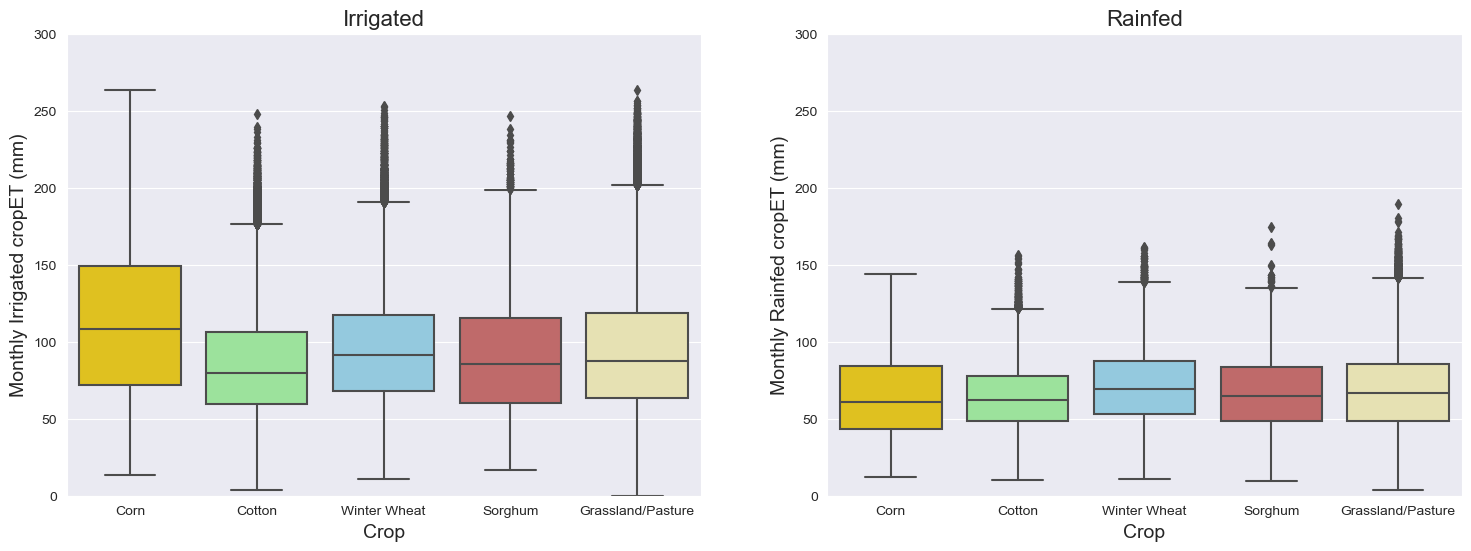

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.set_style("darkgrid")

# setting similar color palette for similar crops 
category_colors = {'Corn': 'gold', 'Cotton': 'lightgreen', 'Winter Wheat': 'skyblue', 'Sorghum': 'indianred', 'Alfalfa': 'lightgreen', 
                          'Soybeans': 'tan', 'Grassland/Pasture': 'palegoldenrod'}

# category order
category_order_irr = ['Corn', 'Cotton', 'Winter Wheat', 'Sorghum', 'Grassland/Pasture']
category_order_rain = ['Corn', 'Cotton', 'Winter Wheat', 'Sorghum', 'Grassland/Pasture']

# irrigated
sns.boxplot(x=TX_irrigated_df_filtered['Crop'], y=TX_irrigated_df_filtered['Irrigated_cropET'], ax=ax[0], palette=category_colors, order=category_order_irr)
ax[0].set_xlabel('Crop', fontsize=14)
ax[0].set_ylabel('Monthly Irrigated cropET (mm)', fontsize=14)
ax[0].tick_params(axis='both', labelsize=10)
ax[0].set_title('Irrigated', fontsize=16)
ax[0].set_ylim(0, 300)

# rainfed
sns.boxplot(x=TX_rainfed_df_filtered['Crop'], y=TX_rainfed_df_filtered['Rainfed_cropET'], ax=ax[1], palette=category_colors, order=category_order_rain)
ax[1].set_xlabel('Crop', fontsize=14)
ax[1].set_ylabel('Monthly Rainfed cropET (mm)', fontsize=14)
ax[1].tick_params(axis='both', labelsize=10)
ax[1].set_title('Rainfed', fontsize=16)
ax[1].set_ylim(0, 300)

Except Soybeans, all other crops seems to have higher median irrigated cropET than rainfed cropET

#### Corn

(0.0, 300.0)

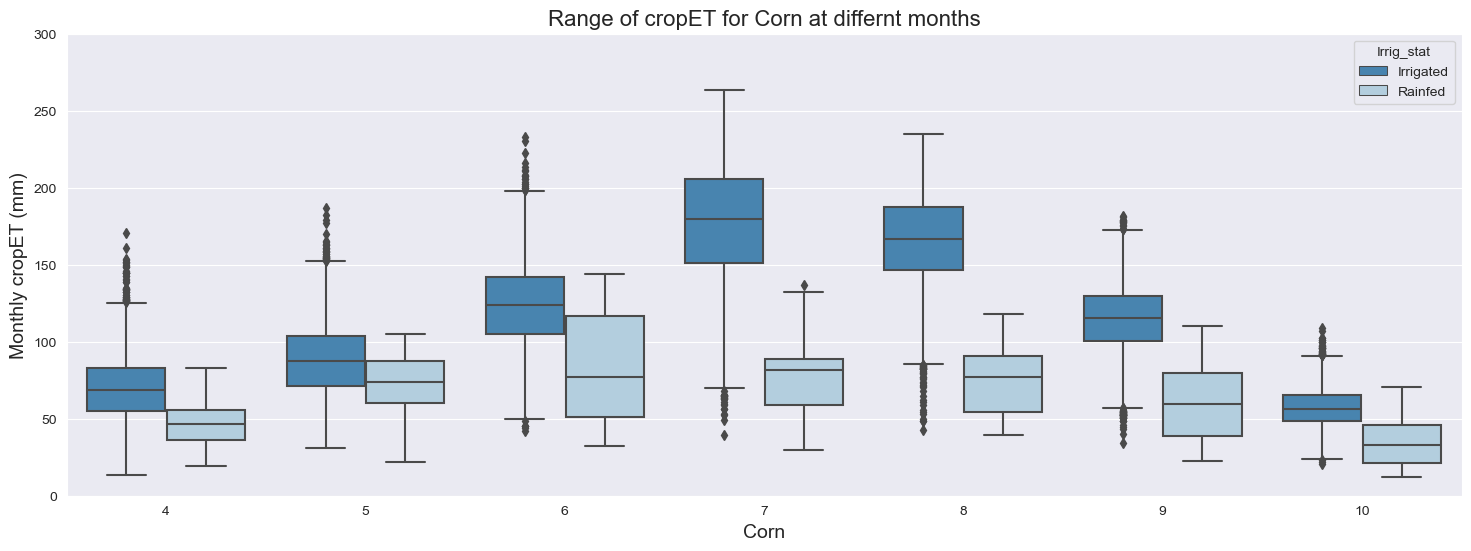

In [9]:
TX_df_crop = TX_monthly_df[TX_monthly_df['Crop'] == 'Corn']

fig, ax = plt.subplots(figsize=(18, 6))
sns.set_style("darkgrid")

sns.boxplot(x=TX_df_crop['month'], y=TX_df_crop['Irrig_rainfed_cropET'], ax=ax, hue=TX_df_crop['Irrig_stat'], palette='Blues_r')
ax.set_xlabel('Corn', fontsize=14)
ax.set_ylabel('Monthly cropET (mm)', fontsize=14)
ax.tick_params(axis='both', labelsize=10)
ax.set_title('Range of cropET for Corn at differnt months', fontsize=16)
ax.set_ylim(0, 300)

For corn, median __irrigated cropET > rainfed cropET__ for `4-10`.

#### WInter Wheat

(0.0, 300.0)

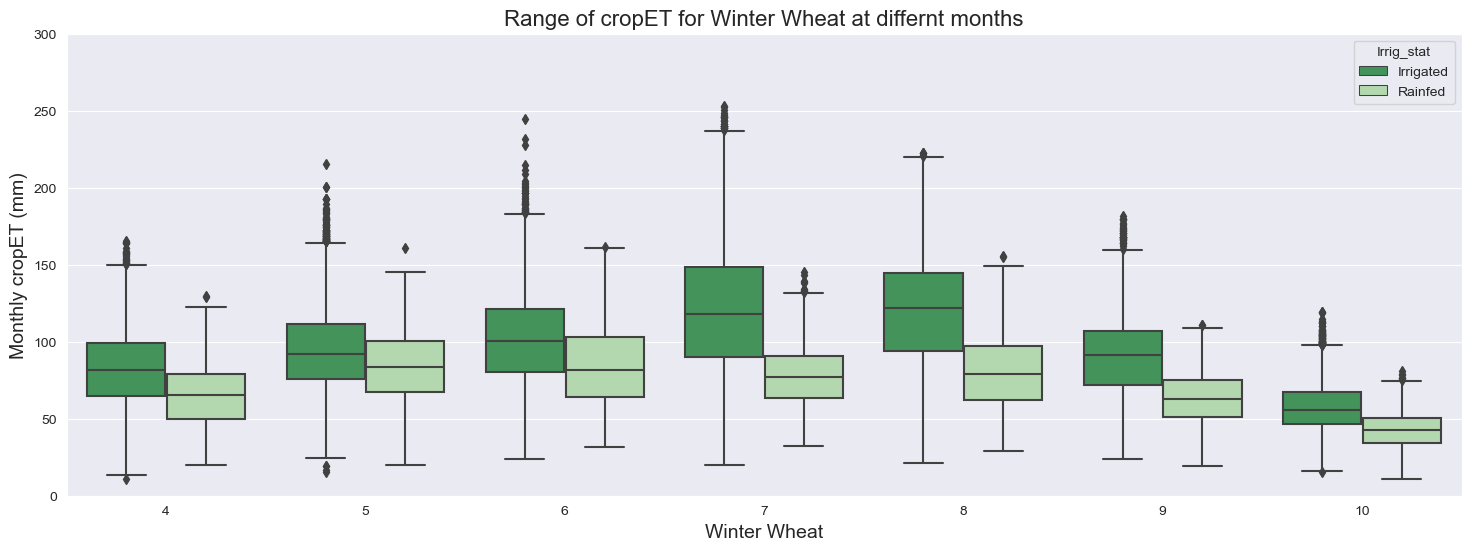

In [10]:
TX_df_crop = TX_monthly_df[TX_monthly_df['Crop'] == 'Winter Wheat']

fig, ax = plt.subplots(figsize=(18, 6))
sns.set_style("darkgrid")

sns.boxplot(x=TX_df_crop['month'], y=TX_df_crop['Irrig_rainfed_cropET'], ax=ax, hue=TX_df_crop['Irrig_stat'], palette='Greens_r')
ax.set_xlabel('Winter Wheat', fontsize=14)
ax.set_ylabel('Monthly cropET (mm)', fontsize=14)
ax.tick_params(axis='both', labelsize=10)
ax.set_title('Range of cropET for Winter Wheat at differnt months', fontsize=16)
ax.set_ylim(0, 300)

For Winter Wheat, median __irrigated cropET > rainfed cropET__ for `4-10`.

#### Cotton

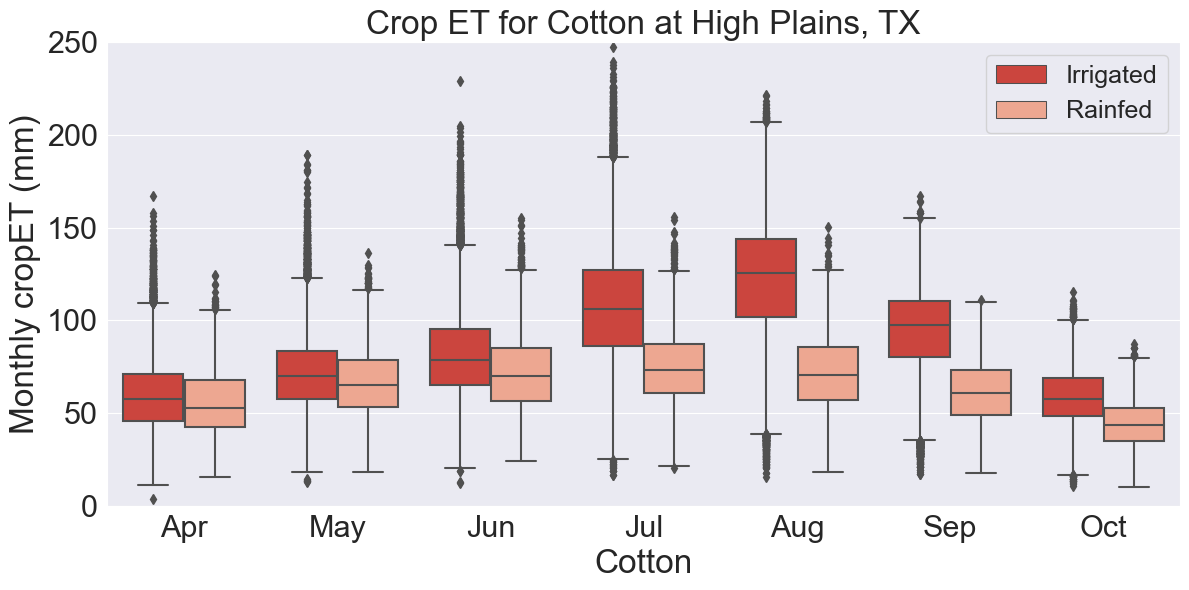

In [8]:
TX_df_crop = TX_monthly_df[TX_monthly_df['Crop'] == 'Cotton']
months = ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']

fig, ax = plt.subplots(figsize=(12, 6))
sns.set_style("darkgrid")
fig.set_facecolor('none')

sns.boxplot(x=TX_df_crop['month'], y=TX_df_crop['Irrig_rainfed_cropET'], ax=ax, 
            hue=TX_df_crop['Irrig_stat'], hue_order=['Irrigated', 'Rainfed'], 
            palette='Reds_r')
ax.set_xlabel('Cotton', fontsize=24)
ax.set_ylabel('Monthly cropET (mm)', fontsize=24)
ax.set_xticklabels(months)
ax.tick_params(axis='both', labelsize=22)
ax.set_title('Crop ET for Cotton at High Plains, TX', fontsize=24)
ax.set_ylim(0, 250)
ax.legend(prop = { "size": 18})
plt.tight_layout()

current_dir = os.getcwd()
figdir = 'figs'
figname = 'Cotton_TX_monthly_cropET.png'
fig.savefig(os.path.join(current_dir, figdir, figname), dpi=150)

For Cotton, median __irrigated cropET > rainfed cropET__ for `4-10`.

## Irrigated vs rainfed yearly

In [4]:
TX_yearly_df = pd.read_csv('../../Data_main/Data_Drivers_of_ET/CSVs/2km/TX_yearly.csv')

# irrigated and rainfed crop status and irrigated and rainfed cropET are exclusive. Creating columns to bring them in same colums for plotting purpose
TX_yearly_df['Irrig_stat'] = ['Irrigated'  if i == 1 else 'Rainfed' for i in TX_yearly_df.Irrigated] 
TX_yearly_df['Irrig_rainfed_cropET'] = TX_yearly_df['Irrigated_cropET'] + TX_yearly_df['Rainfed_cropET']

# filtering out some cells which are neither irrigated or rainfed (0 values were assigned from reference raster)
TX_yearly_df = TX_yearly_df[(TX_yearly_df.Irrigated == 1) | (TX_yearly_df.Rainfed == 1)]

# mapping name of crop type using USDA CDL dictionary
TX_yearly_df.loc[:, 'Crop'] = TX_yearly_df['USDA_CDL'].map(usda_cdl_dict)
TX_yearly_df.head()

,USDA_CDL,Irrigated,Rainfed,Irrigated_cropET,Rainfed_cropET,PRISM_PPT,Irrig_stat,Irrig_rainfed_cropET,Crop
0,176.0,0.0,1.0,0.00000,467.66360,475.75198,Rainfed,467.66360,Grassland/Pasture
1,176.0,0.0,1.0,0.00000,454.52686,490.04602,Rainfed,454.52686,Grassland/Pasture
2,176.0,1.0,0.0,687.44714,0.00000,490.04602,Irrigated,687.44714,Grassland/Pasture
3,176.0,1.0,0.0,712.45650,0.00000,481.52800,Irrigated,712.45650,Grassland/Pasture
4,176.0,1.0,0.0,677.63120,0.00000,481.52800,Irrigated,677.63120,Grassland/Pasture


(0.0, 1200.0)

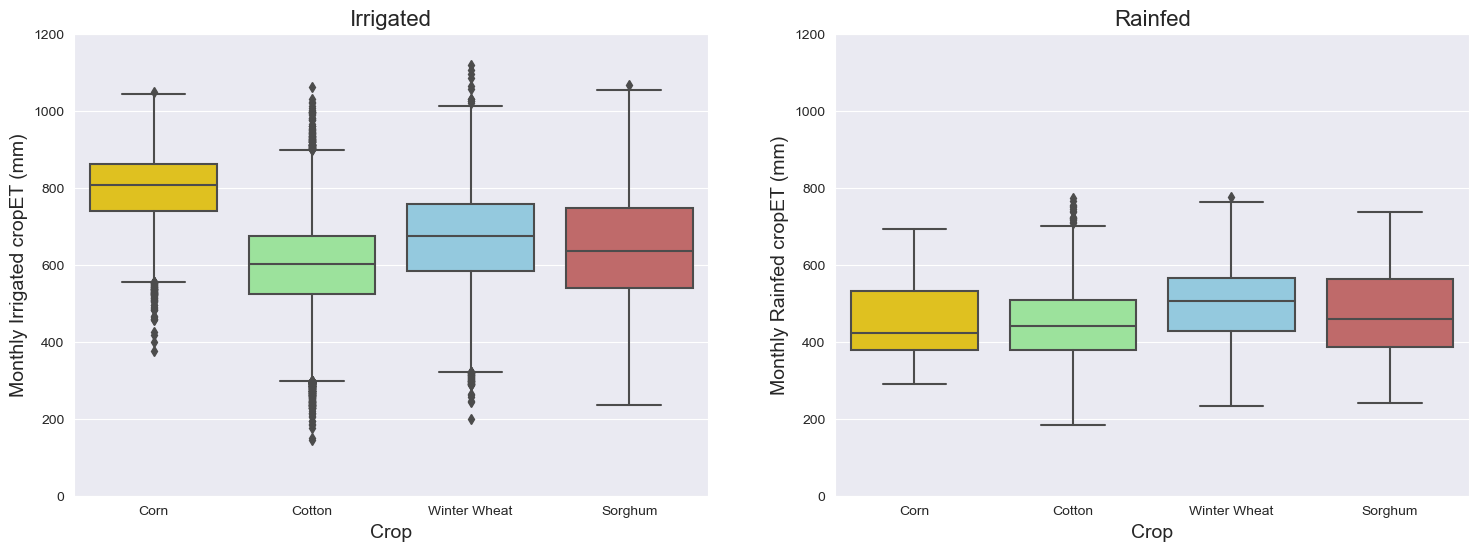

In [6]:
# Filtering Irrigated data only for TX
TX_irrigated_df = TX_yearly_df[TX_yearly_df['Irrigated'] == 1]
TX_irrigated_df_filtered = TX_irrigated_df[TX_irrigated_df['Crop'].isin(['Corn', 'Cotton', 'Winter Wheat', 'Sorghum'])]

# Filtering Rainfed data only for KS
TX_rainfed_df = TX_yearly_df[TX_yearly_df['Rainfed'] == 1]
TX_rainfed_df_filtered = TX_rainfed_df[TX_rainfed_df['Crop'].isin(['Corn', 'Cotton', 'Winter Wheat', 'Sorghum'])]

# Plotting major irrigated and rainfed crops' yearly irrigated and rainfed cropET
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.set_style("darkgrid")

# setting similar color palette for similar crops 
category_colors = {'Corn': 'gold', 'Cotton': 'lightgreen', 'Winter Wheat': 'skyblue', 'Sorghum': 'indianred', 
                   'Alfalfa': 'lightgreen', 'Soybeans': 'tan', 'Grassland/Pasture': 'palegoldenrod'}

# category order
category_order_irr = ['Corn', 'Cotton', 'Winter Wheat', 'Sorghum']
category_order_rain = ['Corn', 'Cotton', 'Winter Wheat', 'Sorghum']

# irrigated
sns.boxplot(x=TX_irrigated_df_filtered['Crop'], y=TX_irrigated_df_filtered['Irrigated_cropET'], ax=ax[0], palette=category_colors, order=category_order_irr)
ax[0].set_xlabel('Crop', fontsize=14)
ax[0].set_ylabel('Monthly Irrigated cropET (mm)', fontsize=14)
ax[0].tick_params(axis='both', labelsize=10)
ax[0].set_title('Irrigated', fontsize=16)
ax[0].set_ylim(0, 1200)

# rainfed
sns.boxplot(x=TX_rainfed_df_filtered['Crop'], y=TX_rainfed_df_filtered['Rainfed_cropET'], ax=ax[1], palette=category_colors, order=category_order_rain)
ax[1].set_xlabel('Crop', fontsize=14)
ax[1].set_ylabel('Monthly Rainfed cropET (mm)', fontsize=14)
ax[1].tick_params(axis='both', labelsize=10)
ax[1].set_title('Rainfed', fontsize=16)
ax[1].set_ylim(0, 1200)

### Ratio between Rainfed cropET (Effective Precip) vs Irrigated cropET __Using yearly medians__

In [7]:
TX_irrigated_df = TX_yearly_df[TX_yearly_df['Irrigated'] == 1]
irrigated_cropET_df_count = TX_irrigated_df.groupby(by='Crop', axis=0)['Irrigated_cropET'].count().reset_index()
irrigated_cropET_df_count = irrigated_cropET_df_count.rename(columns={'Irrigated_cropET': 'Irr_count'})
irrigated_cropET_df = TX_irrigated_df.groupby(by='Crop', axis=0)['Irrigated_cropET'].median()
irrigated_cropET_df = irrigated_cropET_df.reset_index()


TX_rainfed_df = TX_yearly_df[TX_yearly_df['Rainfed'] == 1]
rainfed_cropET_df_count = TX_rainfed_df.groupby(by='Crop', axis=0)['Rainfed_cropET'].count().reset_index()
rainfed_cropET_df_count = rainfed_cropET_df_count.rename(columns={'Rainfed_cropET': 'Rain_count'})
rainfed_cropET_df = TX_rainfed_df.groupby(by='Crop', axis=0)['Rainfed_cropET'].median()
rainfed_cropET_df = rainfed_cropET_df.reset_index()

# merging 2 dataframes
effective_precip_ratio_df = irrigated_cropET_df.merge(rainfed_cropET_df, on=['Crop']).merge(irrigated_cropET_df_count, on='Crop').merge(rainfed_cropET_df_count, on='Crop')
effective_precip_ratio_df['ratio_effec_precip'] = effective_precip_ratio_df['Rainfed_cropET'] / effective_precip_ratio_df['Irrigated_cropET']
effective_precip_ratio_df

,Crop,Irrigated_cropET,Rainfed_cropET,Irr_count,Rain_count,ratio_effec_precip
0,Barley,703.187700,533.458500,7,3,0.758629
1,Corn,806.763585,422.036440,3972,19,0.523123
2,Cotton,602.379245,440.001340,23840,3415,0.730439
3,Dbl Crop WinWht/Cotton,674.114215,601.319685,30,2,0.892015
4,Dbl Crop WinWht/Sorghum,840.701900,504.820210,59,4,0.600475
5,Grassland/Pasture,662.966400,474.348100,12974,18241,0.715493
6,Millet,646.264040,410.740280,9,6,0.635561
7,Oats,761.516600,436.308470,6,1,0.572947
8,Other Hay/Non Alfalfa,611.782050,490.593100,52,21,0.801908
9,Peanuts,575.964675,414.846300,76,18,0.720263


We can only trust crops that have relatively significat samples on both side (not disproportionate)
- 'Barley', 'Corn', 'Cotton', 'Peanuts', 'Sod/Grass Seed', 'Millet', 'Sorghum', 'Winter Wheat', 
                  'Other Hay/Non Alfalfa', 'Grassland/Pasture'

In [13]:
selected_crops = ['Corn', 'Cotton', 'Peanuts', 'Sorghum', 'Winter Wheat', 'Grassland/Pasture']
effective_precip_ratio_df = effective_precip_ratio_df[effective_precip_ratio_df['Crop'].isin(selected_crops)]
effective_precip_ratio_df = effective_precip_ratio_df.reset_index(drop=True)
effective_precip_ratio_df

,Crop,Irrigated_cropET,Rainfed_cropET,Irr_count,Rain_count,ratio_effec_precip
0,Corn,806.763585,422.03644,3972,19,0.523123
1,Cotton,602.379245,440.00134,23840,3415,0.730439
2,Grassland/Pasture,662.966400,474.34810,12974,18241,0.715493
3,Peanuts,575.964675,414.84630,76,18,0.720263
4,Sorghum,636.829475,459.71252,1240,263,0.721877
5,Winter Wheat,673.583950,504.80232,9764,1720,0.749427


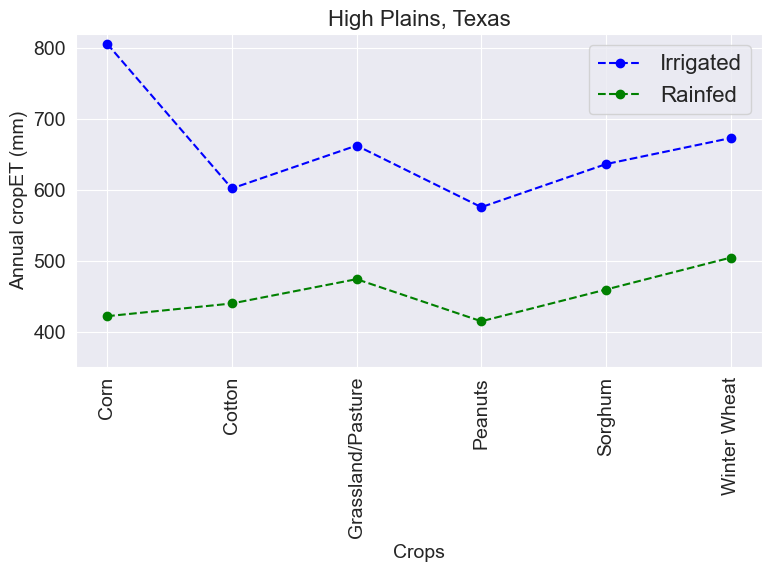

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style("darkgrid")
fig.set_facecolor('none')
plt.rcParams['font.size'] = '16'

ax.plot(effective_precip_ratio_df.Irrigated_cropET, 'b--', label='Irrigated', marker='o')
ax.plot(effective_precip_ratio_df.Rainfed_cropET, 'g--', label='Rainfed', marker='o')
ax.set_xticks(list(range(len(effective_precip_ratio_df))), labels= effective_precip_ratio_df.Crop, rotation=90)
ax.set_xlabel('Crops')
ax.set_ylabel('Annual cropET (mm)')
ax.tick_params(axis='both')
ax.set_ylim(350, 820)
ax.set_title('High Plains, Texas', fontsize=16)
ax.legend()
plt.tight_layout()

current_dir = os.getcwd()
figdir = 'figs'
figname = 'median crop ET for crops boxplot Texas.png'
fig.savefig(os.path.join(current_dir, figdir, figname), dpi=150)